# Assignment 1
```Berle, Bastian```
```Holzapfel, Ron```

## Imports
- Import packages
- Set options

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

## Read data and first overview

In [2]:
df = pd.read_csv('data/immo_data.csv')
df = df[df['totalRent'].notna()]
df.reset_index(inplace = True)
df.drop(['serviceCharge', 'baseRent'], axis=1, inplace=True)
df.head(1)

,index,regio1,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228333 entries, 0 to 228332
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     228333 non-null  int64  
 1   regio1                    228333 non-null  object 
 2   heatingType               191510 non-null  object 
 3   telekomTvOffer            200904 non-null  object 
 4   telekomHybridUploadSpeed  37853 non-null   float64
 5   newlyConst                228333 non-null  bool   
 6   balcony                   228333 non-null  bool   
 7   picturecount              228333 non-null  int64  
 8   pricetrend                226724 non-null  float64
 9   telekomUploadSpeed        200283 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           179048 non-null  float64
 12  scoutId                   228333 non-null  int64  
 13  noParkSpaces              77549 non-null   f

In [4]:
df.describe()

,index,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,228333.000000,37853.0,228333.000000,226724.000000,200283.000000,2.283330e+05,179048.000000,2.283330e+05,77549.000000,179048.00000,228333.00000,228333.000000,228333.000000,228333.000000,134600.000000,187963.000000,148984.000000,228333.000000,228333.000000,73166.000000,72805.000000,39455.000000,39455.000000
mean,134153.700810,10.0,9.868495,3.394387,28.928361,9.013315e+02,1965.701499,1.068847e+08,1.310655,3.68571,73.68226,3.748227,36502.575103,2.619613,113.937084,2.131888,3.581492,2.556135,3.041838,77.105893,2013.863856,89.111892,0.200080
std,77596.030391,0.0,6.441233,2.002065,16.302435,3.323833e+04,47.852184,1.251187e+07,4.155981,2.72948,273.76076,2.215678,27985.290240,1.726725,59.848315,3.554003,5.887249,0.935408,1.392369,152.591860,10.750599,5.398371,0.009629
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.00000,0.00000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,67011.000000,10.0,6.000000,1.960000,10.000000,4.698000e+02,1940.000000,1.066222e+08,1.000000,1.00000,54.00000,2.000000,9120.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,53.802500,2012.000000,90.760000,0.191500
50%,133982.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1972.000000,1.111396e+08,1.000000,3.00000,67.00000,3.000000,37520.000000,3.000000,106.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,201307.000000,10.0,13.000000,4.600000,40.000000,9.850000e+02,1996.000000,1.137651e+08,1.000000,5.00000,86.00000,5.000000,56073.000000,3.000000,139.000000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,268848.000000,10.0,112.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,320.000000,9.00000,111111.00000,9.000000,99998.000000,560.000000,1983.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [5]:
df.nunique()

index                       228333
regio1                          16
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    89
pricetrend                    1223
telekomUploadSpeed               7
totalRent                    28486
yearConstructed                432
scoutId                     228333
noParkSpaces                    66
firingTypes                    119
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
houseNumber                   4955
livingSpace                  12523
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       48158
streetPlain                  50070
lift                             2
baseRentRange       

## Feature selection

In [6]:
df.drop(['telekomHybridUploadSpeed'], axis=1, inplace=True) # has only one value
df.drop(['date'], axis=1, inplace=True) # scraping is irrelavant to the price; not possible for real environment
df.drop(['geo_bln'], axis=1, inplace=True) # same as regio1
df.drop(['houseNumber', 'street', 'streetPlain', 'regio3', 'description', 'facilities', 'scoutId'], axis=1, inplace=True) # too many (unrelated) values
df.drop(['baseRentRange'], axis=1, inplace=True) # without knowing the baseRent we cannot know the baseRentRange

In [7]:
# columns with more than 40% of sparsity will be removed
is_na = df.isna().sum()
columns = df.columns[((is_na/len(df)) > 0.40)]
df.drop(columns, axis=1, inplace=True)
columns

Index(['noParkSpaces', 'petsAllowed', 'thermalChar', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

## Data Exploration

<AxesSubplot:>

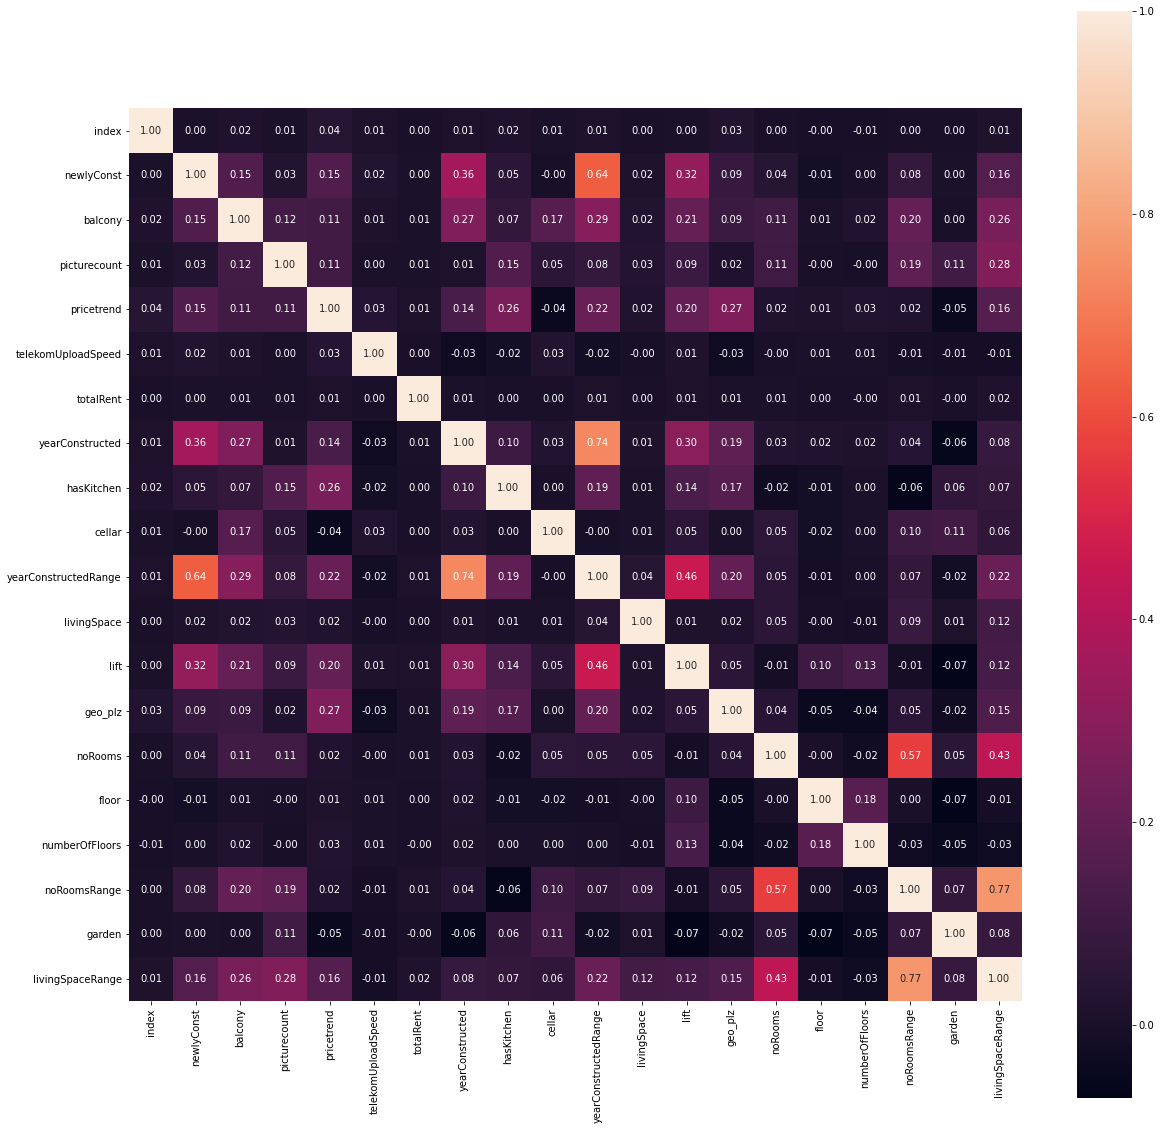

In [8]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, square = True,fmt='.2f', annot = True)

In [9]:
# Remove Ranges
df.drop(['noRoomsRange', 'livingSpaceRange', 'yearConstructedRange'], axis=1, inplace=True)

<AxesSubplot:ylabel='totalRent'>

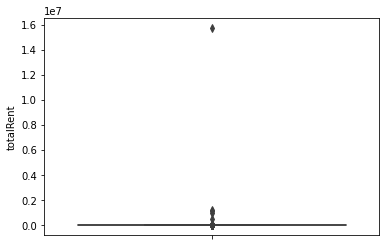

In [10]:
sns.boxplot(data=df, y='totalRent')

In [11]:
# Remove outliers
z = np.abs(stats.zscore(df[['totalRent']]))
outliers = np.where(z > 1)[0]
df.drop(outliers, inplace = True)
df.reset_index(inplace = True)

<AxesSubplot:ylabel='totalRent'>

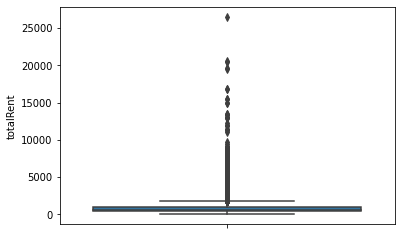

In [12]:
# Remove critical outliers
sns.boxplot(data=df, y='totalRent')

## Data Preparation

In [13]:
#drop reaming rows containing not applicable values
df.dropna(inplace = True)

In [14]:
#one hot encoding for categorical variables
df = pd.get_dummies(df)

In [15]:
#create train, test data set
y_name = 'totalRent'
X = df.loc[:, df.columns != y_name]
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data Modeling

In [16]:
regr = LinearRegression().fit(X_train, y_train)
pred = regr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

369210.920167487

In [17]:
regr = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)
pred = regr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

227.2513874737265

In [18]:
regr = GradientBoostingRegressor().fit(X_train, y_train)
pred = regr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

211.50780299407617